## **Forest Structure Analysis & Classification Using ML**

### **About the Dataset**

**Dataset**: [Tree Inventory and Biometry Measurements, Tapajos National Forest, Para, Brazil, 2010](https://daac.ornl.gov/VEGETATION/guides/Forest_Inventory_Tapajos.html)

**Overview** </br>

This dataset includes information on tree inventory, height, diameter at breast height (DBH), and crown measurements from 30 plots in the Tapajos National Forest in Para, Brazil, collected in September 2010. The plots are divided among primary forest, primary forest that underwent selective logging from 1999 to 2003, and secondary forest with varying ages and disturbance histories. </br></br>

Out of the 50 x 50-meter plots, eight were in primary forests, eight were in logged primary forests, and fourteen were in secondary forests. Trees with a diameter of 5 cm or more in early successional stands and 10 cm or more in other stands were measured and identified by species or genus. DBH was recorded to the nearest 0.1 cm, while heights and crown depths were visually estimated and calibrated using a laser rangefinder. Crown radius was measured in two directions using a tape measure. </br></br>

The Tapajos National Forest is situated about 50 km south of Santarem, Pará, along highway BR-163. </br></br>

This study uses the comma-separated (.csv) file with with the inventory and biometric measurements of trees.

**Columns**: The table below lists the columns in `Tapajos_inventory_data_2010.csv` along with their corresponding units.


| **Column Name**                  | **Units**     | **Description**                                                                 |
|----------------------------------|---------------|---------------------------------------------------------------------------------|
| `plot`                           | —             | Unique plot identifier                                                         |
| `type`                           | —             | Forest type: `SF` = Secondary, `SLF` = Selectively Logged, `PF` = Primary      |
| `origin`                         | —             | Plot corner used as the origin for local coordinates (`NE` or `SW`)            |
| `tree`                           | —             | Tree identification number                                                     |
| `family`                         | —             | Scientific family classification of the tree                                   |
| `genus`                          | —             | Genus classification                                                           |
| `scientific_name`               | —             | Full scientific name (Genus + species)                                         |
| `common_name`                    | —             | Local/common name of the tree                                                  |
| `density_wood`                  | g/cm³         | Wood density (from literature)                                                 |
| `dbh`                            | cm            | Diameter at breast height (1.3 m above ground)                                 |
| `ht_crown_base`                 | m             | Height to the base of the crown                                                |
| `ht_total`                       | m             | Total tree height                                                              |
| `depth_crown`                   | m             | Depth of the crown (ht_total - ht_crown_base)                                  |
| `stem_x`                         | m             | X-coordinate of the tree stem position                                         |
| `stem_y`                         | m             | Y-coordinate of the tree stem position                                         |
| `crown_radius_x0`               | m             | Crown radius from origin to stem along the X-axis                              |
| `crown_radius_x50`              | m             | Crown radius from stem to opposite edge along the X-axis                       |
| `crown_radius_y0`               | m             | Crown radius from origin to stem along the Y-axis                              |
| `crown_radius_y50`              | m             | Crown radius from stem to opposite edge along the Y-axis                       |
| `ht_crown_max_x0`              | m             | Height of maximum crown width at edge closest to origin (X-axis)               |
| `ht_crown_max_x50`             | m             | Height of maximum crown width at far edge from origin (X-axis)                 |
| `ht_crown_max_y0`              | m             | Height of maximum crown width at edge closest to origin (Y-axis)               |
| `ht_crown_max_y50`             | m             | Height of maximum crown width at far edge from origin (Y-axis)                 |
| `shape_coeff_crown_x0`         | unitless       | Shape coefficient above max crown radius, edge near origin (X-axis)           |
| `shape_coeff_crown_x50`        | unitless       | Shape coefficient above max crown radius, edge far from origin (X-axis)       |
| `shape_coeff_crown_y0`         | unitless       | Shape coefficient above max crown radius, edge near origin (Y-axis)           |
| `shape_coeff_crown_y50`        | unitless       | Shape coefficient above max crown radius, edge far from origin (Y-axis)       |
| `shape_coeff_crown_below_x0`   | unitless       | Shape coefficient below max crown radius, edge near origin (X-axis)           |
| `shape_coeff_crown_below_x50`  | unitless       | Shape coefficient below max crown radius, edge far from origin (X-axis)       |
| `shape_coeff_crown_below_y0`   | unitless       | Shape coefficient below max crown radius, edge near origin (Y-axis)           |
| `shape_coeff_crown_below_y50`  | unitless       | Shape coefficient below max crown radius, edge far from origin (Y-axis)       |


### **Research Question**

> What are the main differences in forest structure and tree types between primary, logged, and secondary
forests?



This research question aims to identify and compare differences in forest structure (such as tree height, diameter, crown dimensions) and species composition (e.g., tree family, genus) among primary (undisturbed), selectively logged, and secondary (regenerating) forests. Furthermore, three different prediction models will be trained comparing their performance on the given data.

### **Imports**

Import libraries needed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.inspection import permutation_importance

### **Load Dataset**
Load the CSV file into a DataFrame named df.

Make sure to download the dataset and upload it under the Files (the one with the Folder Icon) of Google Colab.




In [2]:
df = pd.read_csv('Tapajos_inventory_data_2010.csv')

Display the first five rows of the DataFrame using **`.head(5)`** to get an initial overview of the data.


In [3]:
df.head(5)

,plot,type,origin,tree,family,genus,scientific_name,common_name,density_wood,dbh,...,ht_crown_max_y0,ht_crown_max_y50,shape_coeff_crown_x0,shape_coeff_crown_x50,shape_coeff_crown_y0,shape_coeff_crown_y50,shape_coeff_crown_below_x0,shape_coeff_crown_below_x50,shape_coeff_crown_below_y0,shape_coeff_crown_below_y50
0,1,SF,NE,1,Hypericaceae,Vismia,Vismia guianensis,Lacre branco,0.480,5.9,...,4.5,6.0,4.0,2.0,0.4,4.0,0.8,0.4,0.3,0.8
1,1,SF,NE,2,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,7.4,...,-9999.0,7.1,1.3,1.6,-9999.0,1.6,0.8,0.6,-9999.0,0.6
2,1,SF,NE,3,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,6.3,...,-9999.0,7.1,8.0,-9999.0,-9999.0,8.0,8.8,-9999.0,-9999.0,8.8
3,1,SF,NE,4,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,5.4,...,-9999.0,2.3,1.0,-9999.0,-9999.0,1.3,0.3,-9999.0,-9999.0,0.3
4,1,SF,NE,5,Chrysobalanaceae,Couepia,Couepia sp.,Macucu,0.791,8.1,...,5.8,9.3,2.7,2.0,2.7,8.0,6.0,0.8,0.8,0.8


Use **`.info()`** to display a summary of the DataFrame, including data types, non-null counts, and memory usage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   plot                         3390 non-null   int64  
 1   type                         3390 non-null   object 
 2   origin                       3300 non-null   object 
 3   tree                         3390 non-null   int64  
 4   family                       3390 non-null   object 
 5   genus                        3390 non-null   object 
 6   scientific_name              3390 non-null   object 
 7   common_name                  3390 non-null   object 
 8   density_wood                 3390 non-null   float64
 9   dbh                          3390 non-null   float64
 10  ht_crown_base                3390 non-null   float64
 11  ht_total                     3390 non-null   float64
 12  depth_crown                  3390 non-null   float64
 13  stem_x            

The output of **.info()** shows that the dataset contains 31 columns, indexed from 0 to 30. Most columns have non-null values and are of the **`float64`** data type.Except **`type`, `origin`, `family`, `genus`, `scientific_name`**, and **`common_name`**, which are of **`object`** (string) type, as well as **`plot`** and **`tree`**, which are of **`int64`** type.

Use **`.describe()`** to generate basic statistical summaries for numeric columns, such as mean, standard deviation, and quartiles.

In [5]:
df.describe()

,plot,tree,density_wood,dbh,ht_crown_base,ht_total,depth_crown,stem_x,stem_y,crown_radius_x0,...,ht_crown_max_y0,ht_crown_max_y50,shape_coeff_crown_x0,shape_coeff_crown_x50,shape_coeff_crown_y0,shape_coeff_crown_y50,shape_coeff_crown_below_x0,shape_coeff_crown_below_x50,shape_coeff_crown_below_y0,shape_coeff_crown_below_y50
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,...,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,15.404425,65.171681,0.557042,17.262065,9.329882,15.422271,6.094012,24.963068,25.554277,-7278.786667,...,-7465.295310,-7456.460472,-7449.716106,-7538.265575,-7470.385398,-7470.403982,-7453.320767,-7541.815870,-7471.022094,-7471.019823
std,8.476975,47.853180,0.158676,13.534021,5.192353,7.314929,3.524300,14.465279,13.383397,4451.169753,...,4353.197551,4358.175605,4359.554167,4308.501184,4347.843454,4347.811488,4356.773369,4305.708568,4346.748614,4346.752520
min,1.000000,1.000000,0.160000,5.100000,1.200000,2.900000,0.000000,0.100000,0.100000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,8.000000,29.000000,0.408000,10.300000,5.200000,10.400000,3.800000,12.300000,14.600000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,16.000000,58.000000,0.544000,13.800000,8.600000,13.600000,5.200000,25.100000,25.800000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,22.000000,88.000000,0.656000,19.800000,11.700000,18.800000,7.900000,37.400000,36.800000,0.500000,...,3.150000,3.200000,0.750000,-9999.000000,0.300000,0.300000,0.300000,-9999.000000,0.300000,0.300000
max,30.000000,263.000000,0.980000,171.900000,31.800000,45.700000,24.900000,49.900000,49.900000,17.800000,...,39.400000,40.900000,8.000000,8.000000,8.000000,8.000000,8.800000,4.000000,8.000000,8.800000


Lastly, use **`.shape`** to display the dimensions of the DataFrame (rows, columns), to understand its size.

In [6]:
df.shape

(3390, 31)

### **Data Preprocessing**
In this section, the data will be prepared for analysis by performing data preprocessing steps.

#### Missing Values

In [7]:
# Check number of null values in the DataFrame.
print(df.isnull().sum())

plot                            0
type                            0
origin                         90
tree                            0
family                          0
genus                           0
scientific_name                 0
common_name                     0
density_wood                    0
dbh                             0
ht_crown_base                   0
ht_total                        0
depth_crown                     0
stem_x                          0
stem_y                          0
crown_radius_x0                 0
crown_radius_x50                0
crown_radius_y0                 0
crown_radius_y50                0
ht_crown_max_x0                 0
ht_crown_max_x50                0
ht_crown_max_y0                 0
ht_crown_max_y50                0
shape_coeff_crown_x0            0
shape_coeff_crown_x50           0
shape_coeff_crown_y0            0
shape_coeff_crown_y50           0
shape_coeff_crown_below_x0      0
shape_coeff_crown_below_x50     0
shape_coeff_cr

The output shows that there are 90 rows that has missing values for the column **`origin`**.

In [8]:
# Check count of each unique value in origin column
df['origin'].value_counts()

,count
origin,
SW,2453
NE,847


The value counts for each unique value in the origin column does not total to 3390. Next we will check for columns with value **`-9999`** which indicates missing or data is not provided.

In [9]:
# Check which column or row has the value -9999 indicating missing or data that is not provided.
(df == -9999).sum()

,0
plot,0
type,0
origin,0
tree,0
family,0
genus,0
scientific_name,0
common_name,0
density_wood,0
dbh,0


As seen from the table above, the columns related to tree crowns have more than 50% missing values. For now, only rows with missing origin will be dropped.

In [10]:
# drop rows with missing origin
df = df.dropna()

In [11]:
# Check number of null values in the DataFrame.
print(df.shape)
print(df.isnull().sum())

(3300, 31)
plot                           0
type                           0
origin                         0
tree                           0
family                         0
genus                          0
scientific_name                0
common_name                    0
density_wood                   0
dbh                            0
ht_crown_base                  0
ht_total                       0
depth_crown                    0
stem_x                         0
stem_y                         0
crown_radius_x0                0
crown_radius_x50               0
crown_radius_y0                0
crown_radius_y50               0
ht_crown_max_x0                0
ht_crown_max_x50               0
ht_crown_max_y0                0
ht_crown_max_y50               0
shape_coeff_crown_x0           0
shape_coeff_crown_x50          0
shape_coeff_crown_y0           0
shape_coeff_crown_y50          0
shape_coeff_crown_below_x0     0
shape_coeff_crown_below_x50    0
shape_coeff_crown_below_y0     0

### Duplicates

It was observed that the same tree may have multiple records in the dataset. To confirm this, duplicates were checked based on tree ID numbers using **`tree`** column.

In [12]:
# Check for duplicates in tree column
df['tree'].duplicated().sum()

np.int64(3037)

A **`tree`** ID seems to be duplicated within the column. Now we check **`tree`** ID per **`plot`.**

In [13]:
# Check for duplicates with plot and
df[['plot', 'tree']].duplicated().sum()

np.int64(0)

This shows that the tree id is not globally unique, but it is unique per plot.

In [14]:
# Check number of unique tree id
df['tree'].nunique()

263

The cell below drops duplicates in the dataframe.

In [15]:
# Drop Duplicates
df = df.drop_duplicates()
print(df.shape)

(3300, 31)


### **Exploratory Data Analysis**

**1. Distribution of Numerical Columns**

Histograms are used to visualize the distribution of columns containing numerical values, allowing us to observe patterns, skewness, and potential outliers.

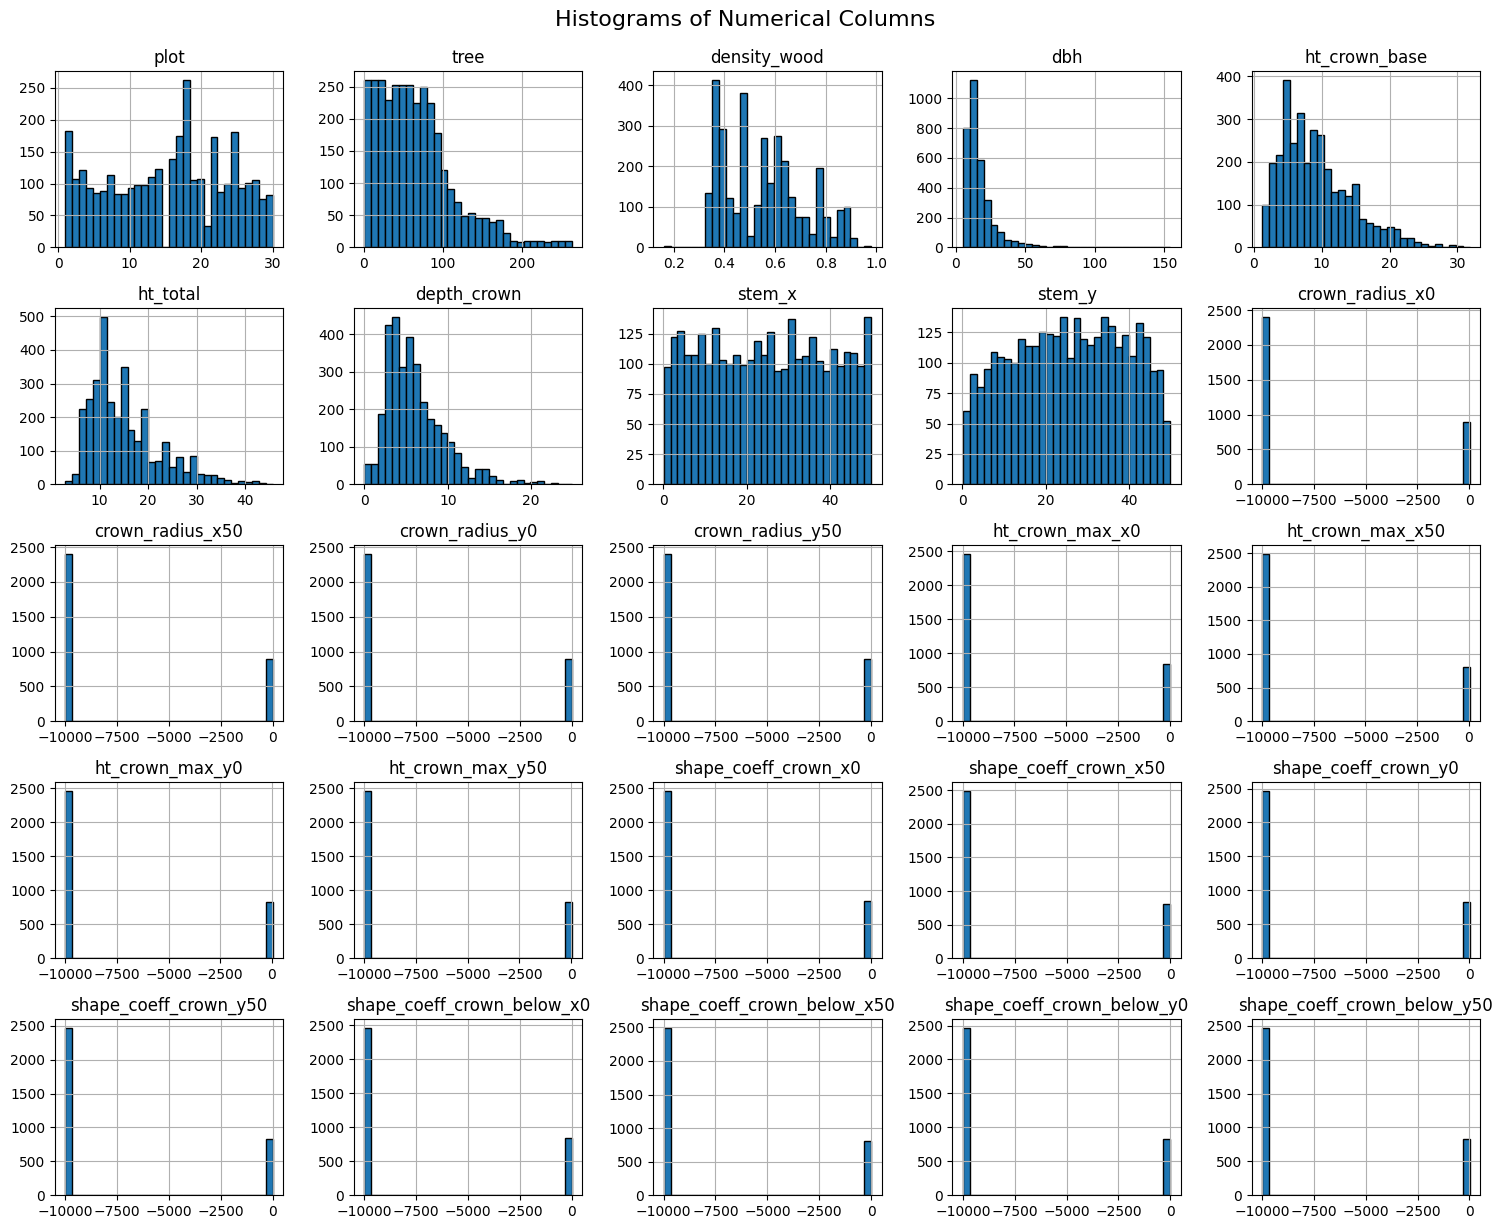

In [16]:
numeric_cols = df.select_dtypes(include='number').columns

# Plot histograms
df[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle('Histograms of Numerical Columns', fontsize=16, y=1.02)
plt.show()

The histograms reveal that most numerical features like `dbh` and `ht_total` are right-skewed, indicating a prevalence of smaller trees with fewer larger ones. `density_wood` shows a more symmetrical distribution, while crown-related features displayed a significant number of -9999 values, confirming extensive missing data. This analysis highlights the typical structure of the forest data and identifies columns with data quality issues.

**2. Distribution of Categorical Columns**

Bar plots are used to visualize the distribution of categorical columns. This helps identify the frequency of each category and detect any imbalances or dominant classes in the data.

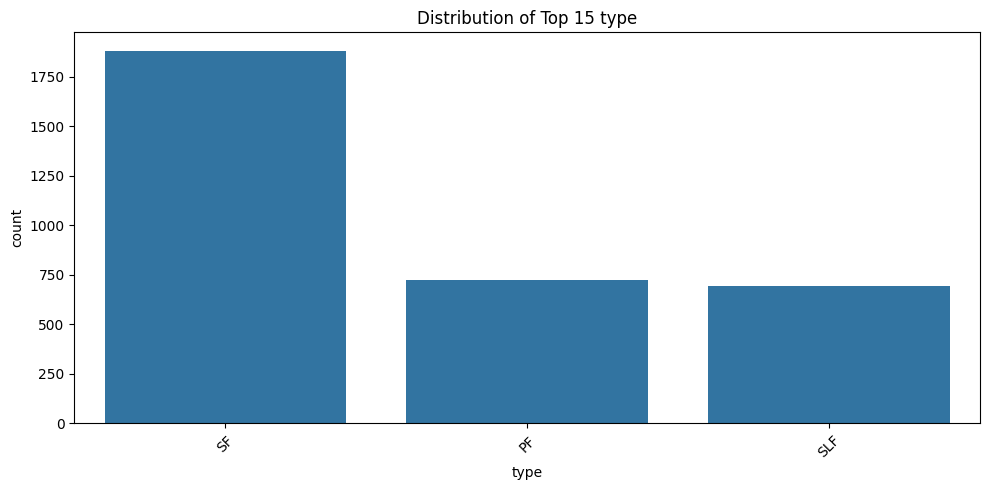

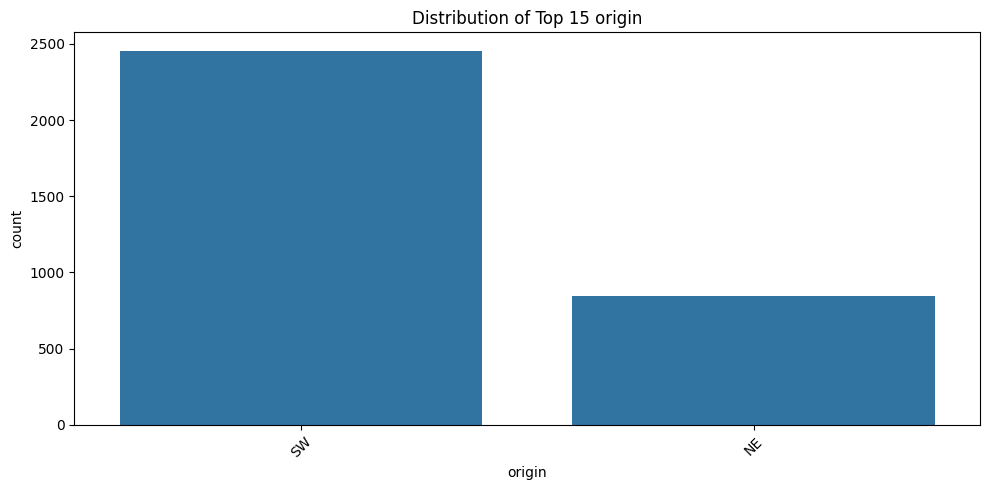

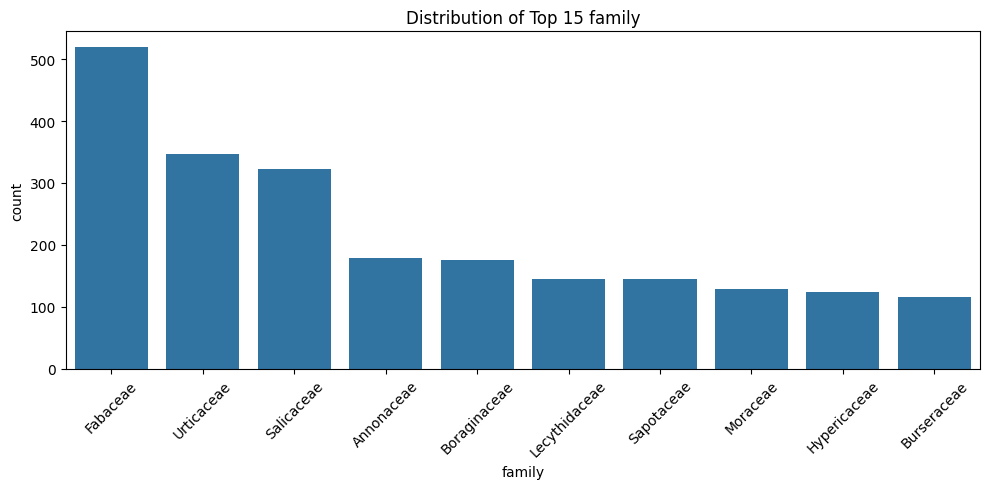

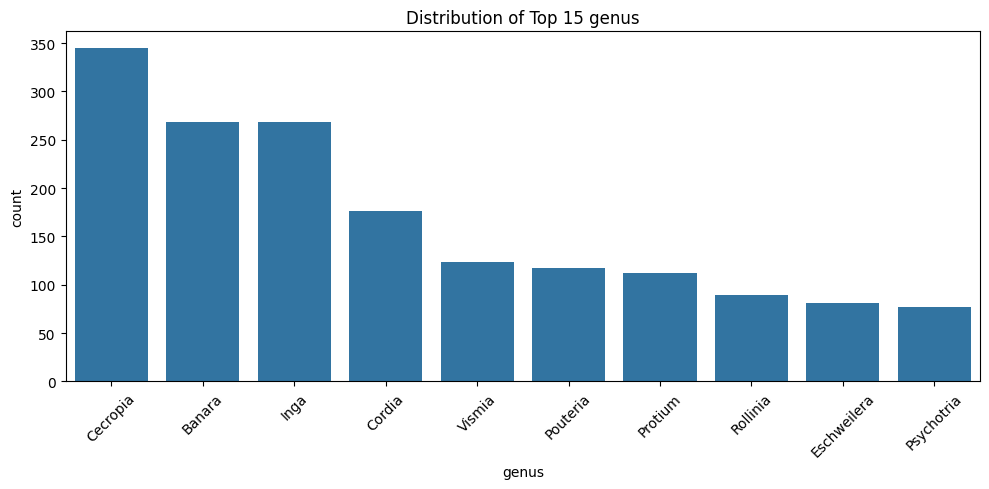

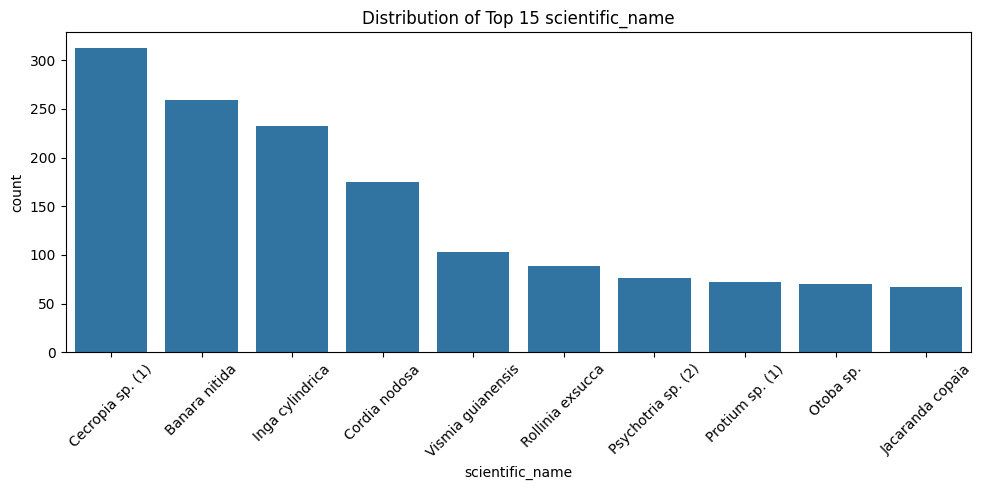

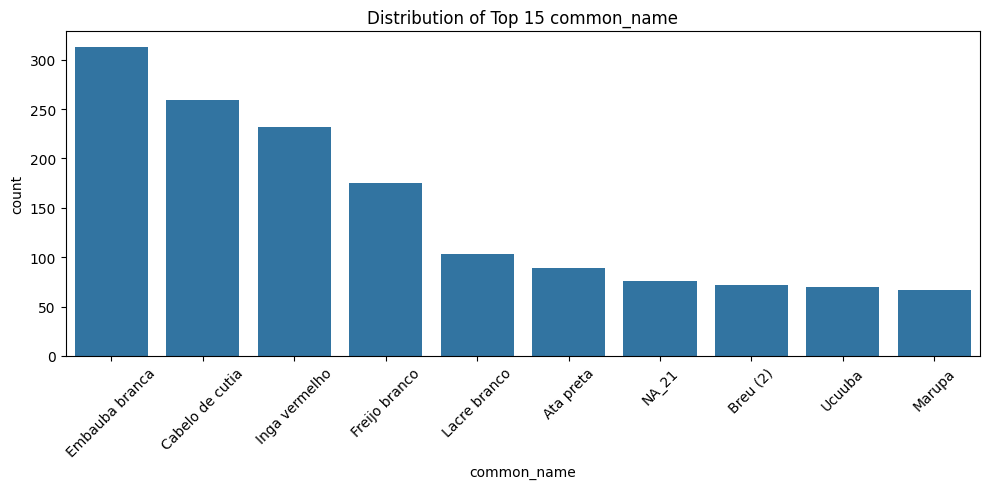

In [17]:
categorical_cols = df.select_dtypes(include='object').columns

# Loop through and plot countplots for each, showing top 10 categories
for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(data=df[df[col].isin(top_categories)], x=col, order=top_categories)

    plt.xticks(rotation=45)
    plt.title(f'Distribution of Top 15 {col}')
    plt.tight_layout()
    plt.show()

The bar plots show that Secondary Forest (SF) is the most frequent forest type, indicating an imbalance in the dataset's distribution across forest types. The `origin` column reveals that "SW" is a more common origin point than "NE". Additionally, the plots for `family`, `genus`, and `scientific_name` highlight the most abundant tree classifications, providing insight into the dominant tree types in the sampled areas.

**3. Tree Height and Diameter per Forest Type**

In [18]:
df.groupby('type')[['ht_total', 'dbh']].describe()

ht_total                                                         dbh  \
        count       mean       std  min    25%   50%    75%   max   count   
type                                                                        
PF      724.0  17.976381  7.893410  5.5  11.85  15.7  22.15  43.8   724.0   
SF     1881.0  12.663743  5.434602  2.9   9.30  11.4  15.70  41.8  1881.0   
SLF     695.0  19.497986  7.747328  3.4  13.60  17.8  24.90  45.7   695.0   

                                                               
           mean        std   min     25%   50%     75%    max  
type                                                           
PF    23.220580  17.733375  10.2  13.475  17.3  25.025  141.3  
SF    12.657523   7.409748   5.1   7.400  11.1  15.100  103.5  
SLF   22.536259  14.996841  10.2  13.500  18.0  25.500  154.4

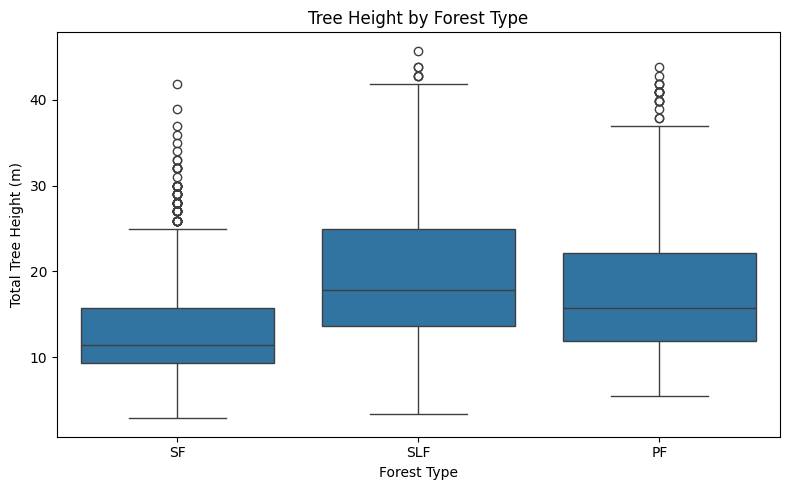

In [19]:
# Tree Height by Forest Type (Boxplot)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='type', y='ht_total')
plt.title('Tree Height by Forest Type')
plt.xlabel('Forest Type')
plt.ylabel('Total Tree Height (m)')
plt.tight_layout()
plt.show()

This boxplot visually compares the distribution of tree heights across the three forest types. It shows that Primary (PF) and Selectively Logged (SLF) forests generally have taller trees with higher median heights and a greater range of heights compared to Secondary Forests (SF). The SF type displays a lower median height and a more condensed distribution, indicating that trees in secondary forests are typically shorter.

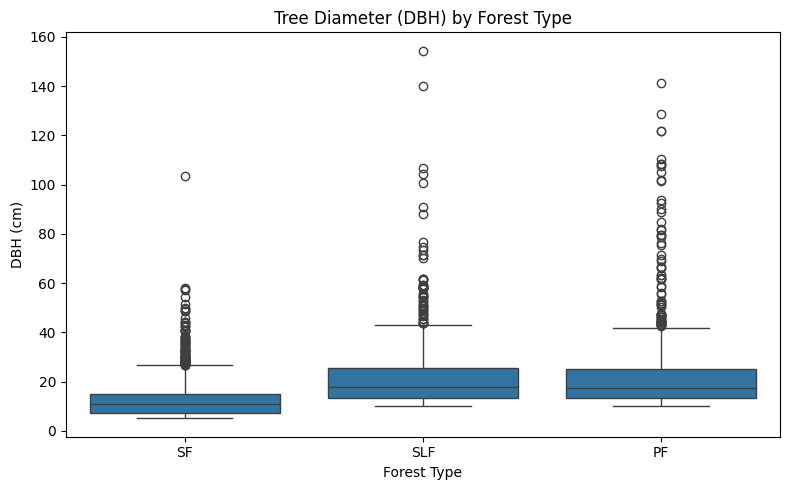

In [20]:
# DBH by Forest Type (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='type', y='dbh')
plt.title('Tree Diameter (DBH) by Forest Type')
plt.xlabel('Forest Type')
plt.ylabel('DBH (cm)')
plt.tight_layout()
plt.show()

This boxplot illustrates the distribution of tree diameters at breast height (DBH) for each forest type. Similar to tree height, trees in Primary (PF) and Selectively Logged (SLF) forests exhibit larger DBH values, with higher medians and more variability than trees in Secondary Forests (SF). The SF type's boxplot is lower and narrower, reflecting that trees in secondary forests generally have smaller diameters.

**4. Tree Density per Plot**

In [21]:
tree_counts = df.groupby(['plot', 'type']).size().reset_index(name='tree_count')
tree_counts.groupby('type')['tree_count'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
PF,8.0,90.500000,10.555973,76.0,83.50,88.5,98.75,106.0
SF,14.0,134.357143,56.566648,33.0,101.25,122.0,173.75,263.0
SLF,7.0,99.285714,11.146214,85.0,91.00,97.0,108.50,114.0


The descriptive statistics for tree density per plot show that Secondary Forests (SF) have the highest average tree count per plot, with a mean of 134.36, and also the widest range and standard deviation in tree density. Selectively Logged Forests (SLF) have a slightly higher average tree count (99.29) compared to Primary Forests (PF) (90.50). Both PF and SLF show less variability in tree density across their plots compared to SF.

**5. Compare Crown Depth and Shape**

In [22]:
df.groupby('type')[['depth_crown', 'shape_coeff_crown_x0']].mean()

,depth_crown,shape_coeff_crown_x0
type,,
PF,7.422238,-7581.344337
SF,5.151090,-7489.027592
SLF,7.103165,-7264.645324


The table shows the average crown depth and the average of one of the shape coefficients (`shape_coeff_crown_x0`) for each forest type. While there are differences in the mean crown depth across the forest types (PF and SLF have larger average depths than SF), the mean values for the shape coefficient are heavily skewed by the large number of -9999 values. Therefore, based on this specific output, we can only meaningfully compare the average crown depth, which is higher in primary and selectively logged forests.

**6. Species Richness (Species per Forest Type)**

In [23]:
species_richness = df.groupby('type')['scientific_name'].nunique().reset_index()
print(species_richness)

  type  scientific_name
0   PF              112
1   SF              111
2  SLF              124


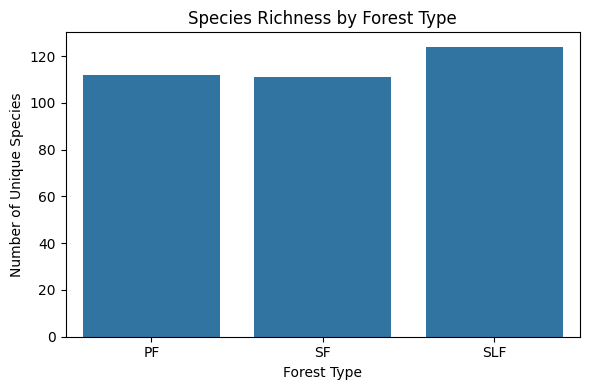

In [24]:
plt.figure(figsize=(6, 4))
sns.barplot(data=species_richness, x='type', y='scientific_name')
plt.title('Species Richness by Forest Type')
plt.ylabel('Number of Unique Species')
plt.xlabel('Forest Type')
plt.tight_layout()
plt.show()

The analysis of species richness shows the number of unique tree species identified in each forest type. Selectively Logged Forests (SLF) have the highest number of unique species (124), followed closely by Primary Forests (PF) with 112 unique species, and then Secondary Forests (SF) with 111. (might remove this part)This suggests that logging activities might initially increase local species diversity or that these areas retain a mix of original and colonizing species, while secondary forests are still developing their full species composition.

**7. Family Composition Comparison**

In [25]:
df.groupby('type')['family'].value_counts(normalize=True).unstack().fillna(0)

family,Anacardiaceae,Annonaceae,Apocynaceae,Araliaceae,Arecaceae,Bignoniaceae,Bixaceae,Boraginaceae,Burseraceae,Cannabaceae,...,Salicaceae,Sapindaceae,Sapotaceae,Simaroubaceae,Siparunaceae,Solanaceae,Ulmaceae,Urticaceae,Violaceae,Vochysiaceae
type,,,,,,,,,,,,,,,,,,,,,
PF,0.012431,0.030387,0.020718,0.001381,0.000000,0.005525,0.000000,0.027624,0.088398,0.000000,...,0.015193,0.004144,0.077348,0.004144,0.006906,0.000000,0.001381,0.023481,0.013812,0.019337
SF,0.034024,0.076023,0.002127,0.003721,0.012759,0.022860,0.017544,0.080808,0.002658,0.002658,...,0.157363,0.006911,0.006911,0.002127,0.004253,0.001063,0.000000,0.152047,0.002658,0.000000
SLF,0.020144,0.018705,0.011511,0.004317,0.002878,0.033094,0.005755,0.005755,0.066187,0.000000,...,0.021583,0.002878,0.109353,0.002878,0.000000,0.000000,0.000000,0.063309,0.070504,0.001439


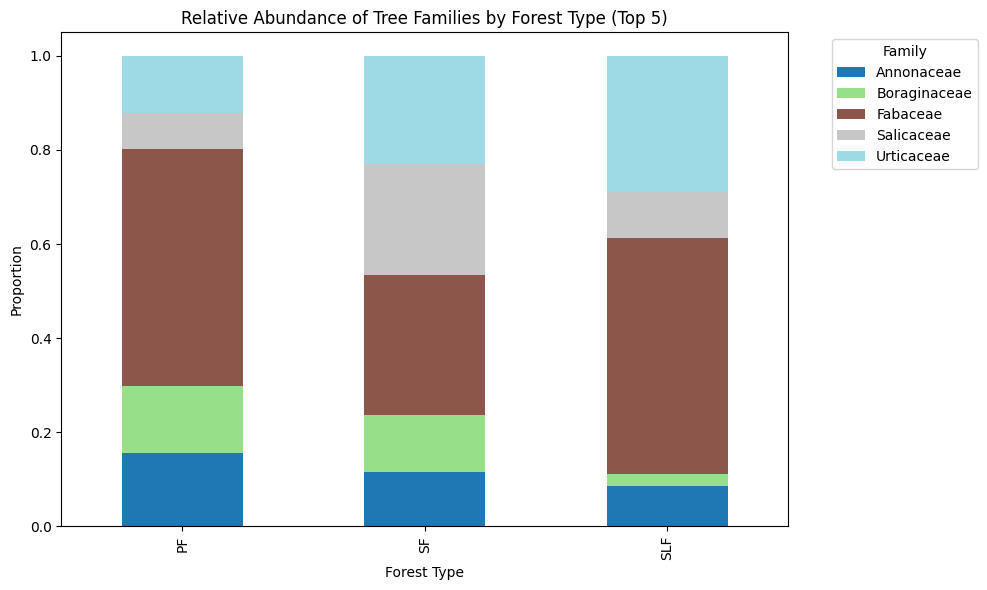

In [26]:
# Family Composition (Stacked Bar Plot)
top_families = df['family'].value_counts().nlargest(5).index
df_top = df[df['family'].isin(top_families)]

family_counts = pd.crosstab(df_top['type'], df_top['family'], normalize='index')

family_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Relative Abundance of Tree Families by Forest Type (Top 5)')
plt.ylabel('Proportion')
plt.xlabel('Forest Type')
plt.legend(title='Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The analysis of family composition, particularly focusing on the top families, reveals distinct differences in the dominant tree families present in each forest type. Secondary Forests (SF) show a higher relative abundance of certain families like Salicaceae and Urticaceae compared to Primary (PF) and Selectively Logged (SLF) forests. Conversely, PF and SLF forests tend to have a higher proportion of families such as Sapotaceae and Burseraceae, indicating variations in taxonomic structure related to forest disturbance history.

**8. Wood Density by Forest Type**

In [27]:
df.groupby('type')['density_wood'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
PF,724.0,0.617768,0.157840,0.34,0.534,0.563,0.770,0.98
SF,1881.0,0.499310,0.132464,0.16,0.380,0.480,0.600,0.98
SLF,695.0,0.634426,0.163360,0.16,0.534,0.650,0.774,0.92


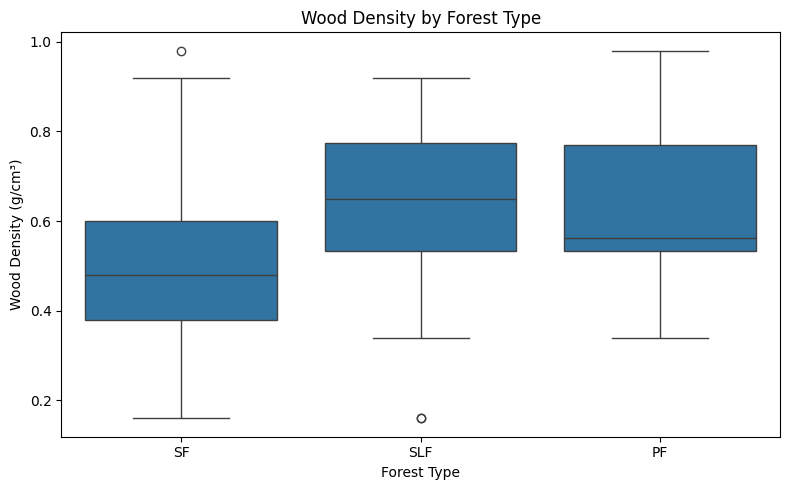

In [28]:
# Wood Density Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='type', y='density_wood')
plt.title('Wood Density by Forest Type')
plt.xlabel('Forest Type')
plt.ylabel('Wood Density (g/cm³)')
plt.tight_layout()
plt.show()

The analysis of wood density shows that Primary (PF) and Selectively Logged (SLF) forests have higher average wood densities compared to Secondary Forests (SF). The box plot visually confirms this, showing that PF and SLF have higher median wood densities and distributions shifted towards higher values. This suggests that trees in more mature or previously logged forests tend to have denser wood than those in regenerating secondary forests.

### **Data Preparation**

**`crown_cols`** contains measurements related to the size, shape, and structure of tree crowns in both horizontal and vertical dimensions. However, due to a high proportion of missing values, these columns will be excluded from model training.

In [29]:
crown_cols = [
    'crown_radius_x0', 'crown_radius_x50', 'crown_radius_y0', 'crown_radius_y50',
    'ht_crown_max_x0', 'ht_crown_max_x50', 'ht_crown_max_y0', 'ht_crown_max_y50',
    'shape_coeff_crown_x0', 'shape_coeff_crown_x50', 'shape_coeff_crown_y0', 'shape_coeff_crown_y50',
    'shape_coeff_crown_below_x0', 'shape_coeff_crown_below_x50',
    'shape_coeff_crown_below_y0', 'shape_coeff_crown_below_y50'
]

df = df.drop(columns=crown_cols)

Show new df after dropping **`crown_cols`**

In [30]:
df.head()

,plot,type,origin,tree,family,genus,scientific_name,common_name,density_wood,dbh,ht_crown_base,ht_total,depth_crown,stem_x,stem_y
0,1,SF,NE,1,Hypericaceae,Vismia,Vismia guianensis,Lacre branco,0.480,5.9,4.5,6.0,1.5,1.8,5.5
1,1,SF,NE,2,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,7.4,4.5,7.1,2.6,3.5,7.0
2,1,SF,NE,3,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,6.3,5.0,7.1,2.1,3.5,0.1
3,1,SF,NE,4,Salicaceae,Banara,Banara nitida,Cabelo de cutia,0.600,5.4,2.3,4.3,1.9,5.0,5.0
4,1,SF,NE,5,Chrysobalanaceae,Couepia,Couepia sp.,Macucu,0.791,8.1,7.6,9.3,1.7,6.5,1.5


Next, features are selected, and the feature matrix X and target variable y are created for model training.

In [31]:
# Select features and target
features = ['ht_total', 'dbh', 'density_wood', 'depth_crown','ht_crown_base', 'stem_x', 'stem_y','origin', 'genus', 'family']
X = df[features]
y = df['type']

## **NEW! Check for correlation of numerical features**

<Axes: >

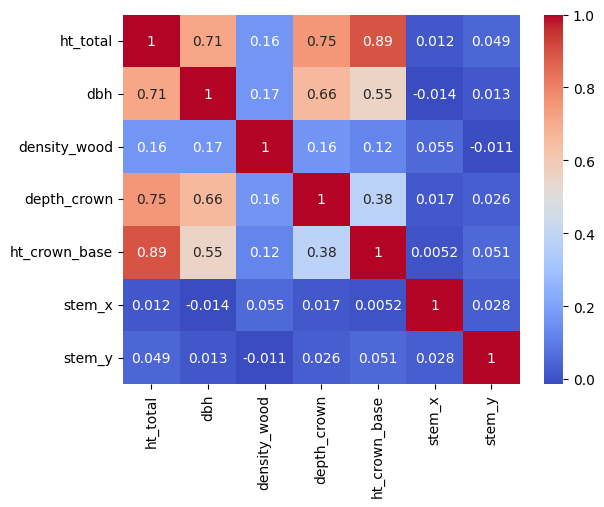

In [32]:
corr = X.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

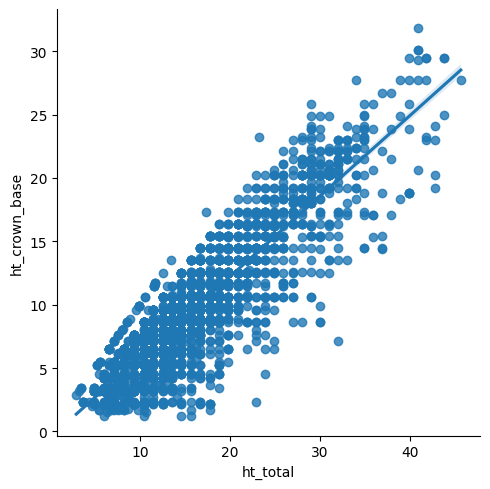

In [33]:
sns.lmplot(x="ht_total", y="ht_crown_base", data=X)  # linear regression line

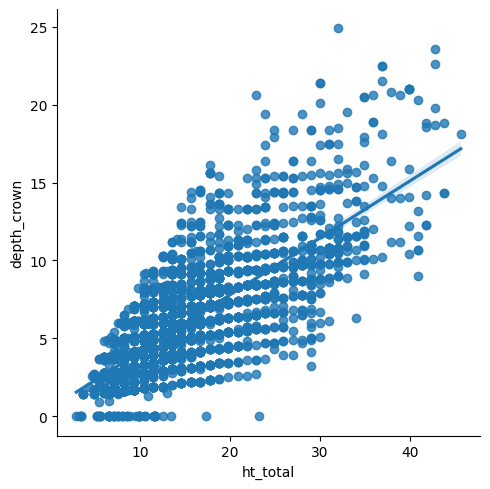

In [34]:
sns.lmplot(x="ht_total", y="depth_crown", data=X)  # linear regression line

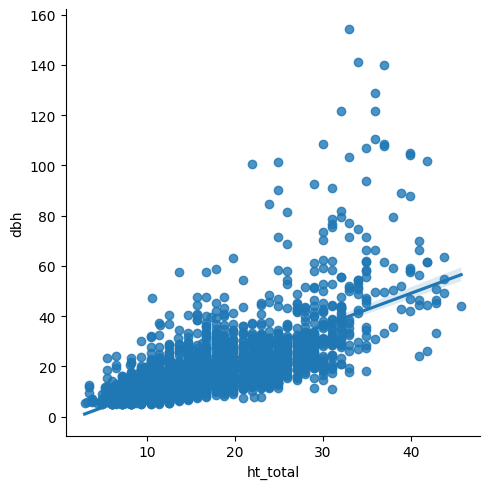

In [35]:
sns.lmplot(x="ht_total", y="dbh", data=X)  # linear regression line

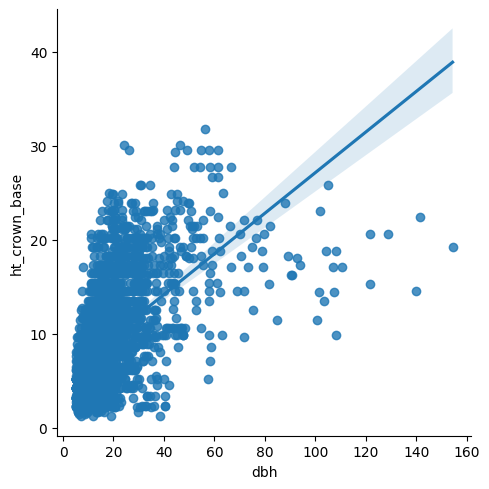

In [36]:
sns.lmplot(x="dbh", y="ht_crown_base", data=X)  # linear regression line

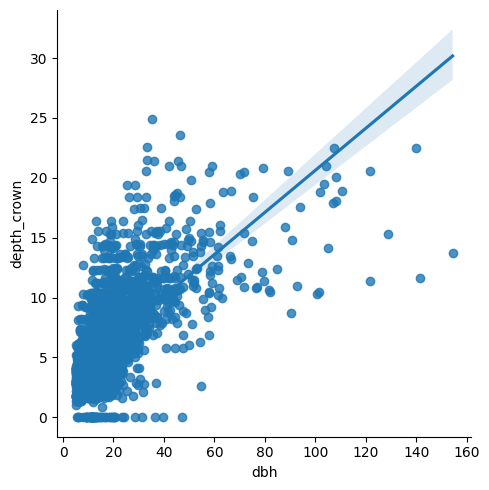

In [37]:
sns.lmplot(x="dbh", y="depth_crown", data=X)  # linear regression line

Show feature matrix **`X`** using **`.head()`**

In [38]:
X.head()

,ht_total,dbh,density_wood,depth_crown,ht_crown_base,stem_x,stem_y,origin,genus,family
0,6.0,5.9,0.480,1.5,4.5,1.8,5.5,NE,Vismia,Hypericaceae
1,7.1,7.4,0.600,2.6,4.5,3.5,7.0,NE,Banara,Salicaceae
2,7.1,6.3,0.600,2.1,5.0,3.5,0.1,NE,Banara,Salicaceae
3,4.3,5.4,0.600,1.9,2.3,5.0,5.0,NE,Banara,Salicaceae
4,9.3,8.1,0.791,1.7,7.6,6.5,1.5,NE,Couepia,Chrysobalanaceae


Encode categorical variables such as **`origin`, `genus`, and `family`** using **OneHotEncoder()**.

In [39]:
categorical_cols = ['origin', 'genus', 'family']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(X[categorical_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

X = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)

Show new feature matrix **`X`** after encoding categorical columns.

In [40]:
X.head()

,ht_total,dbh,density_wood,depth_crown,ht_crown_base,stem_x,stem_y,origin_NE,origin_SW,genus_Acalypha,...,family_Salicaceae,family_Sapindaceae,family_Sapotaceae,family_Simaroubaceae,family_Siparunaceae,family_Solanaceae,family_Ulmaceae,family_Urticaceae,family_Violaceae,family_Vochysiaceae
0,6.0,5.9,0.480,1.5,4.5,1.8,5.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.1,7.4,0.600,2.6,4.5,3.5,7.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.1,6.3,0.600,2.1,5.0,3.5,0.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.3,5.4,0.600,1.9,2.3,5.0,5.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.3,8.1,0.791,1.7,7.6,6.5,1.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Handle missing values
# imputer = SimpleImputer(strategy='mean')
# X = pd.DataFrame(X, columns=features)

Next encode target variable **`y`** using **LabelEncoder()**

In [42]:
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0 = PF, 1 = SF, 2 = SLF

Split data into training and testing.

In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Lastly, the training data is scaled using **StandardScaler()** to standardize the feature values. This step is important for distance-based models like **K-Nearest Neighbors (KNN)**, which are sensitive to the scale of the input features.

In [44]:
# Scale for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Model**

In this section, the prepared data will be used to train three different models in order to compare their performance and methodologies.

### Decision Trees

Decision Tree Report:
               precision    recall  f1-score   support

          PF       0.54      0.57      0.55       133
          SF       0.93      0.92      0.93       392
         SLF       0.57      0.56      0.57       135

    accuracy                           0.77       660
   macro avg       0.68      0.68      0.68       660
weighted avg       0.78      0.77      0.78       660



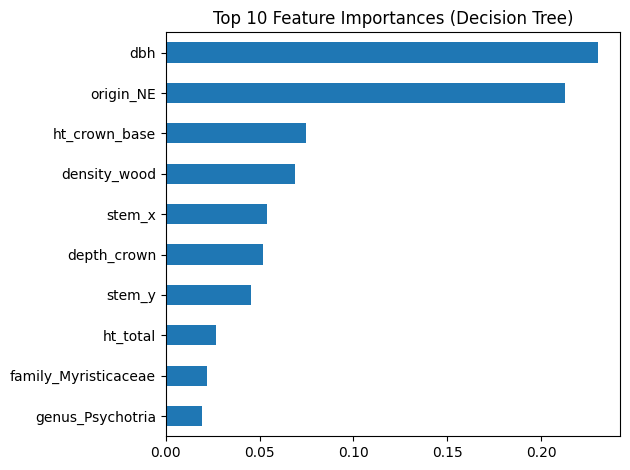

In [45]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Feature Importance
importance_dt = pd.Series(dt.feature_importances_, index=X.columns)

# Plot Top 10 Features
importance_dt.nlargest(10).sort_values().plot(
    kind='barh',
    title="Top 10 Feature Importances (Decision Tree)"
)

plt.tight_layout()
plt.show()

The Decision Tree achieved an overall accuracy of 77%. It performed best on classifying Secondary Forests (SF) with high precision and recall (0.93 and 0.92 respectively). However, its performance was lower for Primary Forests (PF) and Selectively Logged Forests (SLF), with f1-scores of 0.55 and 0.57, indicating more errors in identifying these forest types.

The Decision Tree model identified `dbh` and `origin_NE` as the most important features for classification. Other significant features included `ht_crown_base`, `density_wood`, and `depth_crown`, indicating that tree size and location origin are key discriminators for this model. The remaining features in the top 10 contributed less to the decision-making process.

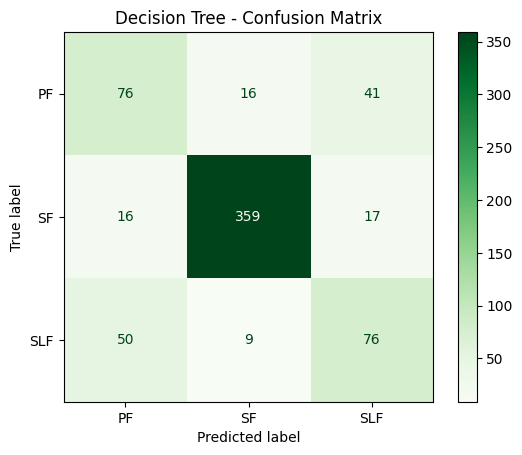

In [46]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=le.classes_)
disp.plot(cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

The confusion matrix shows the Decision Tree model performed very well in classifying Secondary Forests (SF), with high true positives. It had more difficulty distinguishing between Primary Forests (PF) and Selectively Logged Forests (SLF), with a notable number of misclassifications between these two types. This suggests the model is good at identifying SF but less precise with the other two forest types.

### Random Forest

Random Forest Report:
               precision    recall  f1-score   support

          PF       0.63      0.71      0.67       133
          SF       0.95      0.97      0.96       392
         SLF       0.70      0.59      0.64       135

    accuracy                           0.84       660
   macro avg       0.76      0.76      0.76       660
weighted avg       0.84      0.84      0.84       660



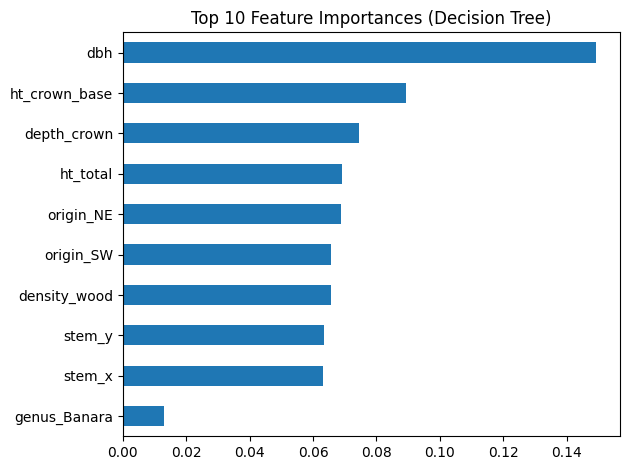

In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Feature Importance
importance_rf = pd.Series(rf.feature_importances_, index=X.columns)

# Plot Top 10 Features
importance_rf.nlargest(10).sort_values().plot(
    kind='barh',
    title="Top 10 Feature Importances (Decision Tree)"
)

plt.tight_layout()
plt.show()

The Random Forest model showed improved overall performance with an accuracy of 84%. It maintained high scores for SF (f1-score 0.96) and significantly improved classification for PF (f1-score 0.67) and SLF (f1-score 0.64) compared to the Decision Tree. This suggests the ensemble method is more effective in correctly identifying all three forest types.

Similar to the Decision Tree, Random Forest also highlighted `dbh` as a top feature, along with various `origin` and tree dimension related features like `ht_crown_base`, `ht_total`, and `stem_y`. The importance values are more distributed across several features compared to the single Decision Tree. This indicates that the ensemble of trees utilizes a broader set of features to make predictions.

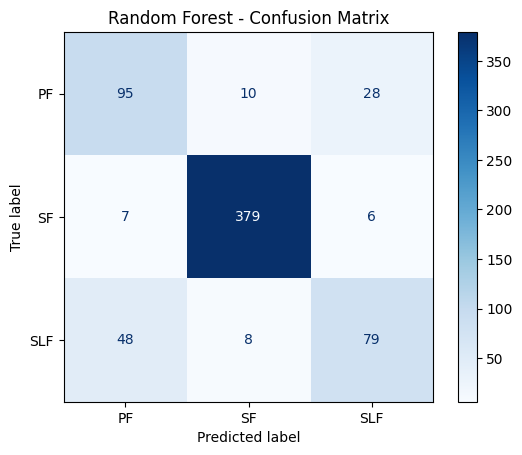

In [48]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

The Random Forest confusion matrix shows improved performance across all classes compared to the Decision Tree, particularly for PF and SLF. While still having some misclassifications between PF and SLF, the numbers are lower than the Decision Tree. This demonstrates that the Random Forest's ensemble approach leads to a more robust and accurate classification across all forest types.

### k-Nearest Neighbors

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Report:\n", classification_report(y_test, y_pred_knn, target_names=le.classes_))

KNN Report:
               precision    recall  f1-score   support

          PF       0.61      0.69      0.65       133
          SF       0.89      0.96      0.92       392
         SLF       0.70      0.47      0.56       135

    accuracy                           0.80       660
   macro avg       0.73      0.71      0.71       660
weighted avg       0.80      0.80      0.79       660



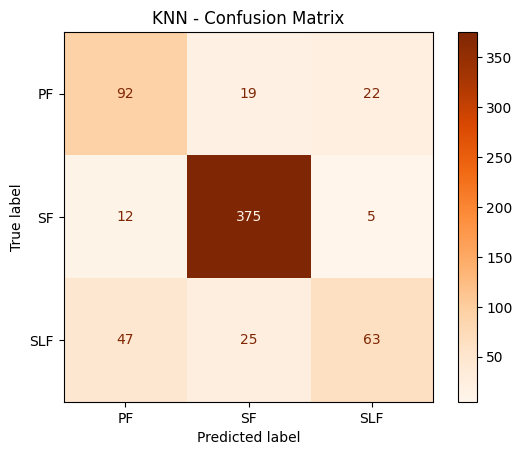

In [50]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=le.classes_)
disp.plot(cmap="Oranges")
plt.title("KNN - Confusion Matrix")
plt.show()

The KNN confusion matrix indicates good performance on the majority class (SF), similar to the other models. However, it shows more difficulty classifying the minority classes, particularly SLF, with a significant number of SLF instances being misclassified as SF. This suggests that while KNN is effective for the dominant class, it struggles with the less represented forest types in this dataset.

In [ ]:
# Permutation Importance
result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Convert to Series
importance_knn = pd.Series(result.importances_mean, index=X.columns)
importance_knn = importance_knn.sort_values(ascending=False)

# # Print or plot top 10
# print("Top 10 Important Features (kNN):\n", importance_knn.head(10))

# Optional: Plot
importance_knn.head(10).sort_values().plot(kind='barh', title="Top 10 Feature Importances (kNN - Permutation)")
plt.tight_layout()
plt.show()

The permutation importance for KNN, which measures the decrease in model score when a feature's values are randomly shuffled, shows `origin_NE` and `origin_SW` as the most important features. `ht_crown_base` and `ht_total` also appear in the top features, suggesting spatial origin and tree height are key factors for KNN's distance-based classification. The importance values are generally lower and more spread out compared to the tree-based models.

### Visualizing the Feature Importance Across the Three Models

In [ ]:
# 1. Decision Tree Importance
importance_dt = pd.Series(dt.feature_importances_, index=X.columns)
importance_dt = importance_dt.sort_values(ascending=False)

# 2. Random Forest Importance
importance_rf = pd.Series(rf.feature_importances_, index=X.columns)
importance_rf = importance_rf.sort_values(ascending=False)

# 3. Combine with kNN importance
combined_df = pd.DataFrame({
    'DecisionTree': importance_dt,
    'RandomForest': importance_rf,
    'kNN_Permutation': importance_knn
})

# Optional: Only show top 10 by average importance
combined_df['avg'] = combined_df.mean(axis=1)
top10 = combined_df.sort_values(by='avg', ascending=False).head(10)
print(top10.drop(columns='avg'))

# 4. Plot Comparison
top10.drop(columns='avg').plot(kind='barh', figsize=(10, 6), title="Top 10 Feature Importances by Model")
plt.tight_layout()
plt.show()


### **Summary and Key Findings**

This analysis explored the structural and compositional differences among primary (PF), selectively logged (SLF), and secondary (SF) forests in the Tapajos National Forest, Brazil, using a dataset of tree inventory and biometry measurements.

<br>

####**Data Preprocessing:**
The dataset was loaded and initially inspected. Missing values were identified in the `origin` column and handled by dropping the corresponding rows. A significant number of missing or unprovided values (-9999) were found in crown-related features, leading to their exclusion from model training. Duplicate checks confirmed that tree IDs are unique within each plot. Categorical features (`origin`, `genus`, `family`) were one-hot encoded, and the target variable (`type`) was label encoded. Numerical features were scaled for use with the KNN model.

<br>

####**Exploratory Data Analysis (EDA):**

* **Numerical Distributions:** Histograms revealed that many numerical features, including `dbh` and `ht_total`, exhibit right-skewed distributions, typical of forest structures with many small and fewer large trees. `density_wood` showed a more symmetrical distribution.

* **Categorical Distributions:** Bar plots highlighted that Secondary Forests (SF) represent the majority class in the dataset, indicating an imbalance. The origin analysis showed a prevalence of the "SW" origin point. The plots also identified the most abundant tree families, genera, and species, revealing differences in taxonomic composition across the forest types.

* **Tree Height and Diameter:** Analysis of `ht_total` and `dbh` showed that trees in PF and SLF generally have larger heights and diameters with higher variability compared to trees in SF, which are typically smaller and more uniform.

* **Tree Density:** Secondary Forests (SF) displayed the highest average tree density per plot and the greatest variability in density, while PF and SLF had lower, less variable densities.

* **Species Richness:** Selectively Logged Forests (SLF) and Primary Forests (PF) showed slightly higher species richness (number of unique species) compared to Secondary Forests (SF).

* **Family Composition:** The relative abundance of tree families differed across forest types. SF had a higher proportion of certain families like Salicaceae and Urticaceae, whereas PF and SLF had a higher proportion of families like Sapotaceae and Burseraceae.

* **Wood Density:** Trees in PF and SLF exhibited higher average wood densities than those in SF.

<br>

###**Models**
Three classification models (Decision Tree, Random Forest, and k-Nearest Neighbors) were trained to predict forest type.

* **Decision Tree:** Achieved 77% accuracy, performing well on SF but struggling with PF and SLF classification. `dbh` and `origin_NE` were identified as most important features.

* **Random Forest:** Showed improved performance with 84% accuracy, classifying all three forest types more effectively than the Decision Tree. `dbh` remained a key feature, along with various tree dimension and origin features.

* **k-Nearest Neighbors (KNN):** Achieved 80% accuracy, performing well on SF but showing limitations in classifying SLF, which was often misclassified as SF. Permutation importance highlighted `origin_NE` and `origin_SW` as highly important features.

<br>

The analysis reveals clear structural and compositional differences among the three forest types. Primary and selectively logged forests tend to have larger trees (height and dbh) and higher wood density compared to secondary forests. Secondary forests, while having higher overall tree density, are composed of smaller trees and a different dominant family composition. The Random Forest model proved most effective in distinguishing between these forest types based on the selected features, with dbh and geographical origin playing significant roles in classification.